# [**Jump to Tasks**](#Tasks)

## Examples


### Example 1

In [ ]:
import numpy as np

class Perceptron:

  def __init__(self, input_size, learning_rate, epochs): # Initialize weights and bias with random values
    self.weights = np.random.rand(input_size)
    self.bias = np.random.rand()
    self.learning_rate = learning_rate
    self.epochs = epochs

  def step_activation(self, x):
    # Step activation function
    return 1 if x >= 0 else 0

  def predict(self, x):
    # Compute the weighted sum of inputs and bias
    net_input = np.dot(x, self.weights) + self.bias
    # Apply step activation function to the net input
    return self.step_activation(net_input)

  def trainSGD(self, X, y):
    # Training loop
    for epoch in range(self.epochs):
      # Initialize Mean Squared Error for this epoch
      total_mse = 0.0

      # Shuffle the training examples for this epoch
      indices = np.arange(len(X))
      np.random.shuffle(indices)
      X_shuffled = X[indices]
      y_shuffled = y[indices]

      # Iterate over each shuffled training example
      for i in range(len(X_shuffled)):
        # Make a prediction for the current input
        prediction = self.predict(X_shuffled[i])
        # Compute the error (desired - predicted)
        error = y_shuffled[i] - prediction
        # Update weights and bias using stochastic gradient descent
        self.weights += self.learning_rate * error * X_shuffled[i]
        self.bias += self.learning_rate * error
        # Accumulate the squared error for this example
        total_mse += error ** 2
      # Calculate the mean squared error for this epoch
      mean_mse = total_mse / len(X)
      print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error:{mean_mse:.4f}")


# Training samples
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])
# Create a perceptron instance with 2 input neurons
perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=10)

# Train the perceptron on the dataset
perceptron.trainSGD(X, y)
# Test the trained perceptron on the testing samples
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for data in test_data:
  prediction = perceptron.predict(data)
  print(f"Input: {data}, Prediction: {prediction}")

Epoch 1/10, Mean Squared Error:0.7500
Epoch 2/10, Mean Squared Error:0.7500
Epoch 3/10, Mean Squared Error:0.7500
Epoch 4/10, Mean Squared Error:0.7500
Epoch 5/10, Mean Squared Error:0.7500
Epoch 6/10, Mean Squared Error:0.7500
Epoch 7/10, Mean Squared Error:0.7500
Epoch 8/10, Mean Squared Error:0.7500
Epoch 9/10, Mean Squared Error:0.7500
Epoch 10/10, Mean Squared Error:0.7500
Input: [0 0], Prediction: 1
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 1


### Example 2

In [ ]:
import numpy as np
import pandas as pd


class Perceptron:
  def __init__(self, input_size, learning_rate, epochs):
    self.weights = np.random.randn(input_size)
    self.bias = np.random.randn()
    self.learning_rate = learning_rate
    self.epochs = epochs

  def linear(self, x):
    return x

  def linear_derivative(self, x):
    return 1

  def predict(self, x):
    net_input = np.dot(x, self.weights) + self.bias
    return self.linear(net_input)

  def trainSGD(self, X, y):
    for epoch in range(self.epochs):
      # Initialize Mean Squared Error for this epoch
      total_mse = 0.0
      # Shuffle the training examples for this epoch
      indices = np.arange(len(X))
      np.random.shuffle(indices)
      X_shuffled = X[indices]
      Y_shuffled = y[indices]
      # Iterate on each sample
      for i in range(len(X)):
        prediction = self.predict(X_shuffled[i])
        error = Y_shuffled[i] - prediction
        # Compute gradients using linear derivative
        delta = error * self.linear_derivative(prediction)
        # Update weights and bias using stochastic gradient descent
        self.weights += self.learning_rate * delta * X_shuffled[i]
        self.bias += self.learning_rate * delta
        # Accumulate the squared error for this example
        total_mse += error ** 2
      # Calculate the mean squared error for this epoch
      mean_mse = total_mse / len(X)
      print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error: {mean_mse:.4f}")

# Generate synthetic data
np.random.seed(42) # For reproducibility
num_samples = 100
x = np.random.uniform(low=0, high=10, size=num_samples)
z=3*x+2
# Create a DataFrame to store the data
data = pd.DataFrame({'x': x, 'z': z})
# Extract the values of all columns (variables x and y) except the last one from DataFrame
F = data.iloc[:, :-1].values
# Extract the values of the last column (output z) from DataFrame
O = data.iloc[:, -1].values
# Create a perceptron instance with appropriate input size
input_size = 1
perceptron = Perceptron(input_size=input_size, learning_rate=0.001, epochs=10)
# Train the perceptron on the dataset
perceptron.trainSGD(F, O)# Test the trained model
for data in x:
  prediction = perceptron.predict(data)
  print(f"Input: {data}, Actual: {3*data+2}, Prediction: {prediction}")

Epoch 1/10, Mean Squared Error: 54.4299
Epoch 2/10, Mean Squared Error: 0.9345
Epoch 3/10, Mean Squared Error: 0.8204
Epoch 4/10, Mean Squared Error: 0.7764
Epoch 5/10, Mean Squared Error: 0.7368
Epoch 6/10, Mean Squared Error: 0.6914
Epoch 7/10, Mean Squared Error: 0.6586
Epoch 8/10, Mean Squared Error: 0.6233
Epoch 9/10, Mean Squared Error: 0.5877
Epoch 10/10, Mean Squared Error: 0.5563
Input: 3.745401188473625, Actual: 13.236203565420874, Prediction: [12.66615598]
Input: 9.50714306409916, Actual: 30.521429192297482, Prediction: [31.18634273]
Input: 7.319939418114051, Actual: 23.959818254342153, Prediction: [24.1559306]
Input: 5.986584841970366, Actual: 19.959754525911098, Prediction: [19.87007811]
Input: 1.5601864044243652, Actual: 6.680559213273096, Prediction: [5.64213673]
Input: 1.5599452033620265, Actual: 6.679835610086079, Prediction: [5.64136143]
Input: 0.5808361216819946, Actual: 3.7425083650459836, Prediction: [2.49417375]
Input: 8.661761457749352, Actual: 27.985284373248057

### Example 3

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Test Accuracy: 0.5000


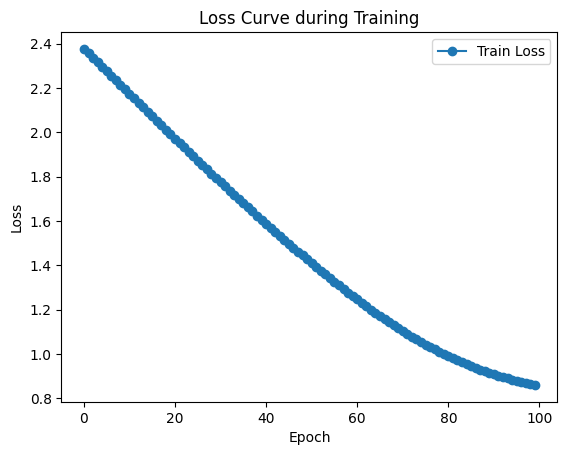

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and validation sets
X_train,  X_test,  y_train,  y_test  =  train_test_split(X,  y,  test_size=0.2, random_state=42)

# Create an MLPClassifier with one hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=100)

# Train the MLPClassifier
mlp.fit(X_train, y_train)

# make prediction on the testing part
y_pred = mlp.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the loss curve
plt.plot(mlp.loss_curve_, marker='o', label='Train Loss')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Example 4

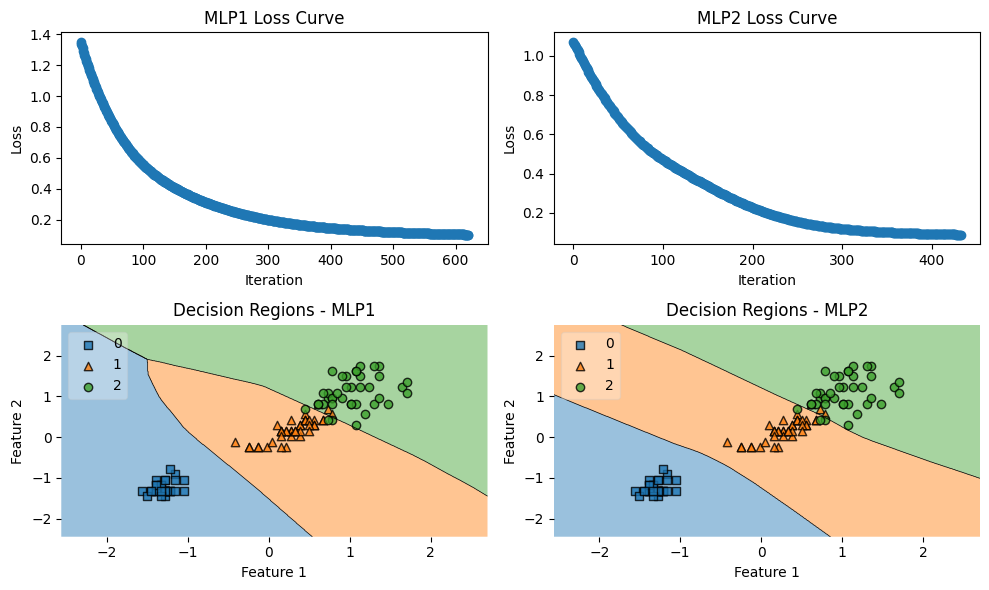

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Select the two most important features based on information gain
k_best = SelectKBest(score_func=mutual_info_classif, k=2)
X_selected = k_best.fit_transform(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create two MLPClassifiers with different configurations
mlp1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp2 = MLPClassifier(hidden_layer_sizes=(35,15), max_iter=1000, random_state=42)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

### Example 5

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


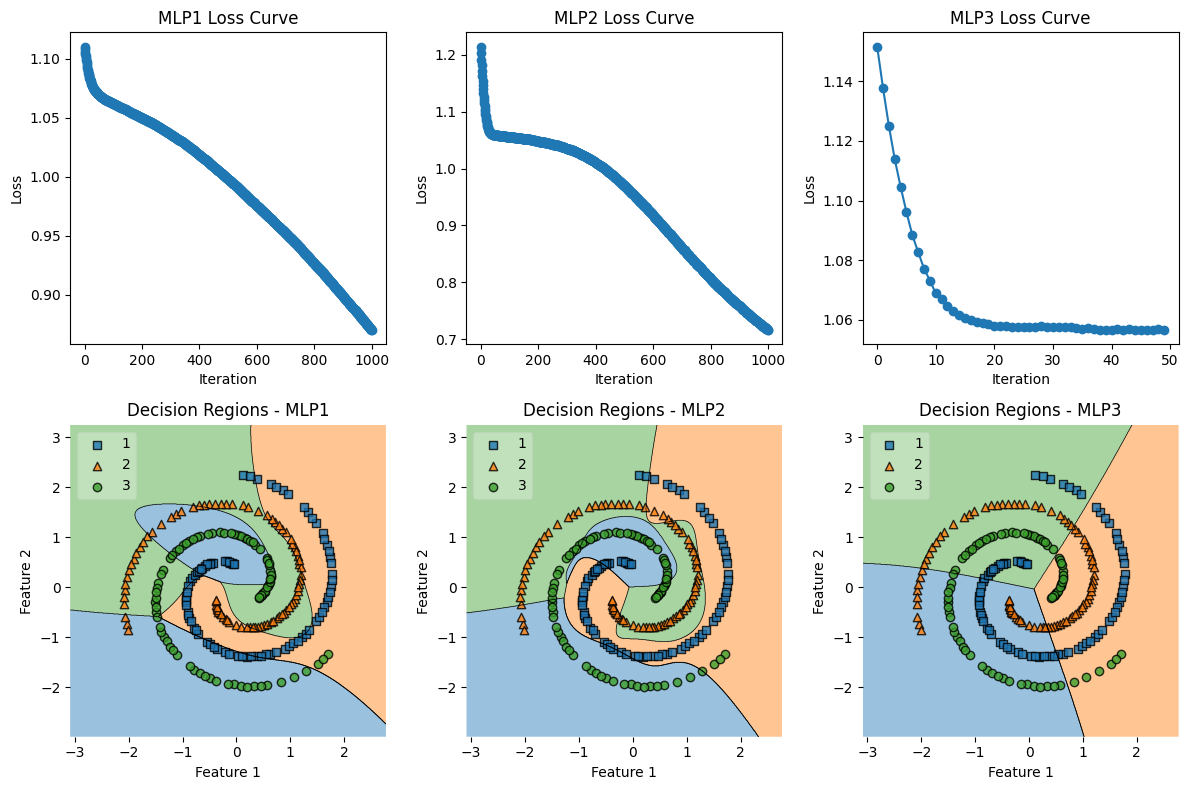

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

file_path = r'./spiral.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values
# Split the data into training and testing sets
X_train,  X_test,  y_train,  y_test  =  train_test_split(X,  y,  test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create three MLPClassifiers with different configurations
mlp1  =  MLPClassifier(hidden_layer_sizes=(10),  max_iter=1000,  random_state=42, activation='tanh',learning_rate_init=0.001)
mlp2  =  MLPClassifier(hidden_layer_sizes=(40),  max_iter=1000,  random_state=42, activation='tanh', learning_rate_init=0.001)
mlp3  =  MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, random_state=42, activation='tanh', learning_rate_init=0.001)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)
mlp3.fit(X_train, y_train)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot loss curve for mlp3
axes[0, 2].plot(mlp3.loss_curve_, marker='o')
axes[0, 2].set_title('MLP3 Loss Curve')
axes[0, 2].set_xlabel('Iteration')
axes[0, 2].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Plot decision regions for mlp3
plot_decision_regions(X_train, y_train, clf=mlp3, legend=2, ax=axes[1, 2])
axes[1, 2].set_title('Decision Regions - MLP3')
axes[1, 2].set_xlabel('Feature 1')
axes[1, 2].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

### Example 6

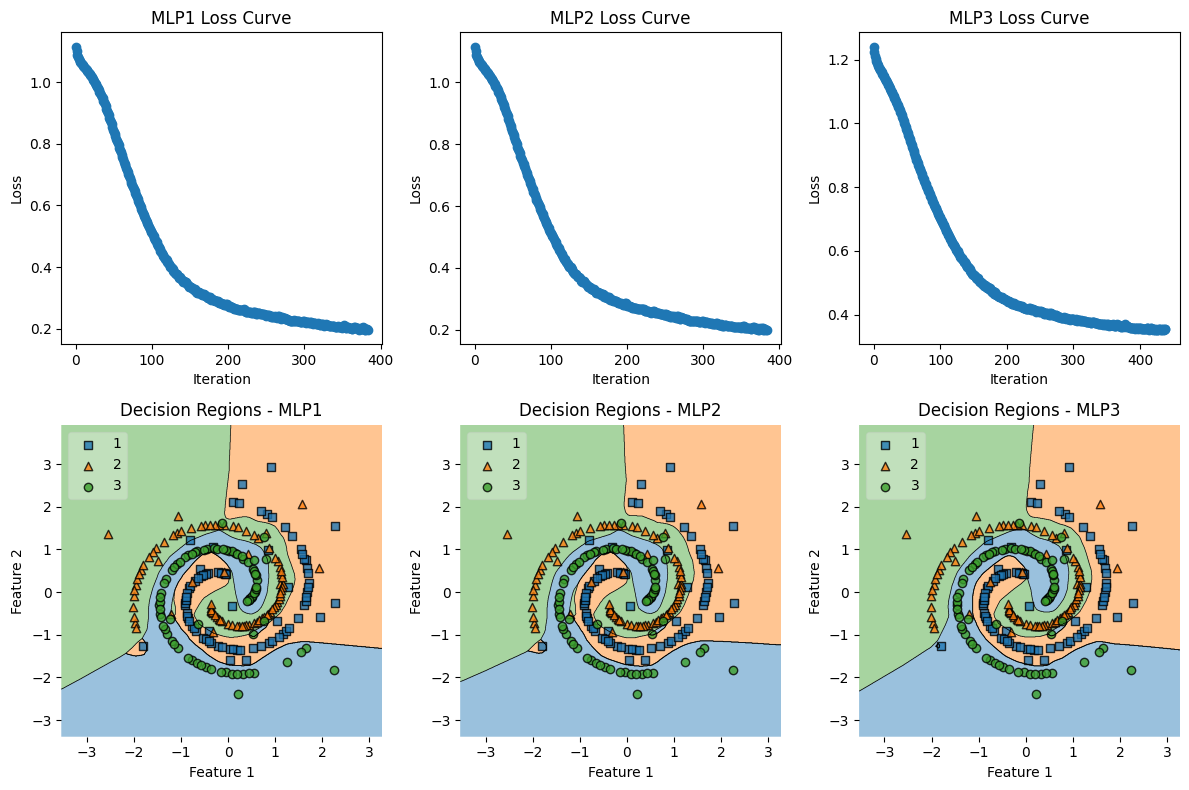

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import numpy as np

file_path = r'./spiral.csv'
data = pd.read_csv(file_path)

# Add outliers to a random subset of the data
outlier_fraction = 0.2   # Adjust the fraction of outliers based on your preference
outliers_mask = np.random.rand(data.shape[0]) < outlier_fraction
spiral_data_with_outliers = data.copy()
spiral_data_with_outliers.iloc[outliers_mask,  :2]  +=  np.random.uniform(-7,  7, (np.sum(outliers_mask), 2))

# Assuming the last column is the target variable and the rest are features
X = spiral_data_with_outliers.iloc[:, :-1]
y = spiral_data_with_outliers.iloc[:, -1]
y = y.values

# Split the data into training and testing sets
X_train,  X_test,  y_train,  y_test  =  train_test_split(X,  y,  test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp1 = MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=1000, random_state=42, solver='adam', learning_rate_init=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
mlp2 = MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=1000, random_state=42, solver='adam', learning_rate_init=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, alpha=0.001)
mlp3 = MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=1000, random_state=42, solver='adam', learning_rate_init=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, alpha=0.3)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)
mlp3.fit(X_train, y_train)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot loss curve for mlp3
axes[0, 2].plot(mlp3.loss_curve_, marker='o')
axes[0, 2].set_title('MLP3 Loss Curve')
axes[0, 2].set_xlabel('Iteration')
axes[0, 2].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Plot decision regions for mlp3
plot_decision_regions(X_train, y_train, clf=mlp3, legend=2, ax=axes[1, 2])
axes[1, 2].set_title('Decision Regions - MLP3')
axes[1, 2].set_xlabel('Feature 1')
axes[1, 2].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

<a name="Tasks"></a>
## Tasks

### Task 6.1

In [ ]:
import numpy as np

class Perceptron:

    def __init__(self, input_size, learning_rate, epochs):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        self.learning_rate = learning_rate
        self.epochs = epochs

    def step_activation(self, x):
        # Step activation function
        return 1 if x >= 0 else 0

    def predict(self, x):
        # Compute the weighted sum of inputs and bias
        net_input = np.dot(x, self.weights) + self.bias
        # Apply step activation function to the net input
        return self.step_activation(net_input)

    def trainSGD(self, X, y):
        # Training loop
        for epoch in range(self.epochs):
            # Initialize Mean Squared Error for this epoch
            total_mse = 0.0
            # Shuffle the training examples for this epoch
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            # Iterate over each shuffled training example
            for i in range(len(X_shuffled)):
                # Make a prediction for the current input
                prediction = self.predict(X_shuffled[i])
                # Compute the error (desired - predicted)
                error = y_shuffled[i] - prediction
                # Update weights and bias using stochastic gradient descent
                self.weights += self.learning_rate * error * X_shuffled[i]
                self.bias += self.learning_rate * error
                # Accumulate the squared error for this example
                total_mse += error ** 2
            # Calculate the mean squared error for this epoch
            mean_mse = total_mse / len(X)
            print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error: {mean_mse:.4f}")

    def accuracy(self, X, y):
        correct_predictions = 0
        for i in range(len(X)):
            if self.predict(X[i]) == y[i]:
                correct_predictions += 1
        return correct_predictions / len(X)

# Training samples
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# List of epochs to run
epoch_list = [10, 20, 100, 200]

for epochs in epoch_list:
    print(f"\nTraining with {epochs} epochs")
    perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=epochs)
    perceptron.trainSGD(X, y)

    # Test the trained perceptron on the testing samples
    test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    predictions = [perceptron.predict(data) for data in test_data]
    accuracy = perceptron.accuracy(test_data, y)

    print("Test Results:")
    for data, prediction in zip(test_data, predictions):
        print(f"Input: {data}, Prediction: {prediction}")
    print(f"Accuracy: {accuracy * 100:.2f}%")



Training with 10 epochs
Epoch 1/10, Mean Squared Error: 0.7500
Epoch 2/10, Mean Squared Error: 0.7500
Epoch 3/10, Mean Squared Error: 0.7500
Epoch 4/10, Mean Squared Error: 0.7500
Epoch 5/10, Mean Squared Error: 0.7500
Epoch 6/10, Mean Squared Error: 0.7500
Epoch 7/10, Mean Squared Error: 0.7500
Epoch 8/10, Mean Squared Error: 0.7500
Epoch 9/10, Mean Squared Error: 0.7500
Epoch 10/10, Mean Squared Error: 0.7500
Test Results:
Input: [0 0], Prediction: 1
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 1
Accuracy: 25.00%

Training with 20 epochs
Epoch 1/20, Mean Squared Error: 0.7500
Epoch 2/20, Mean Squared Error: 0.7500
Epoch 3/20, Mean Squared Error: 0.7500
Epoch 4/20, Mean Squared Error: 0.7500
Epoch 5/20, Mean Squared Error: 0.7500
Epoch 6/20, Mean Squared Error: 0.7500
Epoch 7/20, Mean Squared Error: 0.7500
Epoch 8/20, Mean Squared Error: 0.7500
Epoch 9/20, Mean Squared Error: 0.7500
Epoch 10/20, Mean Squared Error: 0.5000
Epoch 11/20, Mean Squared

### Task 6.2

In [ ]:
import numpy as np

class Perceptron:

  def __init__(self, input_size, learning_rate, epochs): # Initialize weights and bias with random values
    self.weights = np.random.rand(input_size)
    self.bias = np.random.rand()
    self.learning_rate = learning_rate
    self.epochs = epochs

  def step_activation(self, x):
    # Step activation function
    return 1 if x >= 0 else 0

  def predict(self, x):
    # Compute the weighted sum of inputs and bias
    net_input = np.dot(x, self.weights) + self.bias
    # Apply step activation function to the net input
    return self.step_activation(net_input)

  def trainSGD(self, X, y):
    # Training loop
    for epoch in range(self.epochs):
      # Initialize Mean Squared Error for this epoch
      total_mse = 0.0

      # Shuffle the training examples for this epoch
      indices = np.arange(len(X))
      np.random.shuffle(indices)
      X_shuffled = X[indices]
      y_shuffled = y[indices]

      # Iterate over each shuffled training example
      for i in range(len(X_shuffled)):
        # Make a prediction for the current input
        prediction = self.predict(X_shuffled[i])
        # Compute the error (desired - predicted)
        error = y_shuffled[i] - prediction
        # Update weights and bias using stochastic gradient descent
        self.weights += self.learning_rate * error * X_shuffled[i]
        self.bias += self.learning_rate * error
        # Accumulate the squared error for this example
        total_mse += error ** 2
      # Calculate the mean squared error for this epoch
      mean_mse = total_mse / len(X)
      print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error:{mean_mse:.4f}")


# Training samples
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])
# # Create a perceptron instance with 2 input neurons
# perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=10)

# # Train the perceptron on the dataset
# perceptron.trainSGD(X, y)
# # Test the trained perceptron on the testing samples
# test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# for data in test_data:
#   prediction = perceptron.predict(data)
#   print(f"Input: {data}, Prediction: {prediction}")


learning_rates = [0.05, 0.1, 0.3]

for rate in learning_rates:
    print(f"\nTraining with {rate} learning rate")
    perceptron = Perceptron(input_size=2, learning_rate=rate, epochs=10)
    perceptron.trainSGD(X, y)

    # Test the trained perceptron on the testing samples
    test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    predictions = [perceptron.predict(data) for data in test_data]

    print("Test Results:")
    for data, prediction in zip(test_data, predictions):
        print(f"Input: {data}, Prediction: {prediction}")


Training with 0.05 learning rate
Epoch 1/10, Mean Squared Error:0.7500
Epoch 2/10, Mean Squared Error:0.7500
Epoch 3/10, Mean Squared Error:0.7500
Epoch 4/10, Mean Squared Error:0.7500
Epoch 5/10, Mean Squared Error:0.7500
Epoch 6/10, Mean Squared Error:0.5000
Epoch 7/10, Mean Squared Error:0.5000
Epoch 8/10, Mean Squared Error:0.5000
Epoch 9/10, Mean Squared Error:0.5000
Epoch 10/10, Mean Squared Error:0.2500
Test Results:
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 1

Training with 0.1 learning rate
Epoch 1/10, Mean Squared Error:0.7500
Epoch 2/10, Mean Squared Error:0.7500
Epoch 3/10, Mean Squared Error:0.7500
Epoch 4/10, Mean Squared Error:0.2500
Epoch 5/10, Mean Squared Error:0.2500
Epoch 6/10, Mean Squared Error:0.2500
Epoch 7/10, Mean Squared Error:0.5000
Epoch 8/10, Mean Squared Error:0.2500
Epoch 9/10, Mean Squared Error:0.0000
Epoch 10/10, Mean Squared Error:0.0000
Test Results:
Input: [0 0], Prediction: 0
Inp

### Task 6.3

The Mean Squared Error is 0.5563, which is relatively small. This value can be seen in how close most of the predicted outputs are to the actual outputs.

### Task 6.4

In [ ]:
import numpy as np
import pandas as pd


class Perceptron:
  def __init__(self, input_size, learning_rate, epochs):
    self.weights = np.random.randn(input_size)
    self.bias = np.random.randn()
    self.learning_rate = learning_rate
    self.epochs = epochs

  def linear(self, x):
    return x

  def linear_derivative(self, x):
    return 1

  def predict(self, x):
    net_input = np.dot(x, self.weights) + self.bias
    return self.linear(net_input)

  def trainSGD(self, X, y):
    for epoch in range(self.epochs):
      # Initialize Mean Squared Error for this epoch
      total_mse = 0.0
      # Shuffle the training examples for this epoch
      indices = np.arange(len(X))
      np.random.shuffle(indices)
      X_shuffled = X[indices]
      Y_shuffled = y[indices]
      # Iterate on each sample
      for i in range(len(X)):
        prediction = self.predict(X_shuffled[i])
        error = Y_shuffled[i] - prediction
        # Compute gradients using linear derivative
        delta = error * self.linear_derivative(prediction)
        # Update weights and bias using stochastic gradient descent
        self.weights += self.learning_rate * delta * X_shuffled[i]
        self.bias += self.learning_rate * delta
        # Accumulate the squared error for this example
        total_mse += error ** 2
      # Calculate the mean squared error for this epoch
      mean_mse = total_mse / len(X)
      print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error: {mean_mse:.4f}")

# Generate synthetic data
np.random.seed(42) # For reproducibility
num_samples = 100
x = np.random.uniform(low=0, high=10, size=num_samples)
z=3*x+2
# Create a DataFrame to store the data
data = pd.DataFrame({'x': x, 'z': z})
# Extract the values of all columns (variables x and y) except the last one from DataFrame
F = data.iloc[:, :-1].values
# Extract the values of the last column (output z) from DataFrame
O = data.iloc[:, -1].values
# Create a perceptron instance with appropriate input size
input_size = 1
perceptron = Perceptron(input_size=input_size, learning_rate=0.001, epochs=100)
# Train the perceptron on the dataset
perceptron.trainSGD(F, O)# Test the trained model
for data in x:
  prediction = perceptron.predict(data)
  print(f"Input: {data}, Actual: {3*data+2}, Prediction: {prediction}")

Epoch 1/100, Mean Squared Error: 54.4299
Epoch 2/100, Mean Squared Error: 0.9345
Epoch 3/100, Mean Squared Error: 0.8204
Epoch 4/100, Mean Squared Error: 0.7764
Epoch 5/100, Mean Squared Error: 0.7368
Epoch 6/100, Mean Squared Error: 0.6914
Epoch 7/100, Mean Squared Error: 0.6586
Epoch 8/100, Mean Squared Error: 0.6233
Epoch 9/100, Mean Squared Error: 0.5877
Epoch 10/100, Mean Squared Error: 0.5563
Epoch 11/100, Mean Squared Error: 0.5246
Epoch 12/100, Mean Squared Error: 0.4978
Epoch 13/100, Mean Squared Error: 0.4716
Epoch 14/100, Mean Squared Error: 0.4448
Epoch 15/100, Mean Squared Error: 0.4222
Epoch 16/100, Mean Squared Error: 0.3983
Epoch 17/100, Mean Squared Error: 0.3772
Epoch 18/100, Mean Squared Error: 0.3527
Epoch 19/100, Mean Squared Error: 0.3370
Epoch 20/100, Mean Squared Error: 0.3189
Epoch 21/100, Mean Squared Error: 0.3008
Epoch 22/100, Mean Squared Error: 0.2853
Epoch 23/100, Mean Squared Error: 0.2705
Epoch 24/100, Mean Squared Error: 0.2559
Epoch 25/100, Mean Squar

The MSE using 100 epochs is 0.0037, which is a signifacnt drop from 0.5563 when using 10 epochs. This shows that more epochs reduce the prediciton error. Which is evident in the values of the prediction outputs, which are almost identical to the actual outputs

### Task 6.5

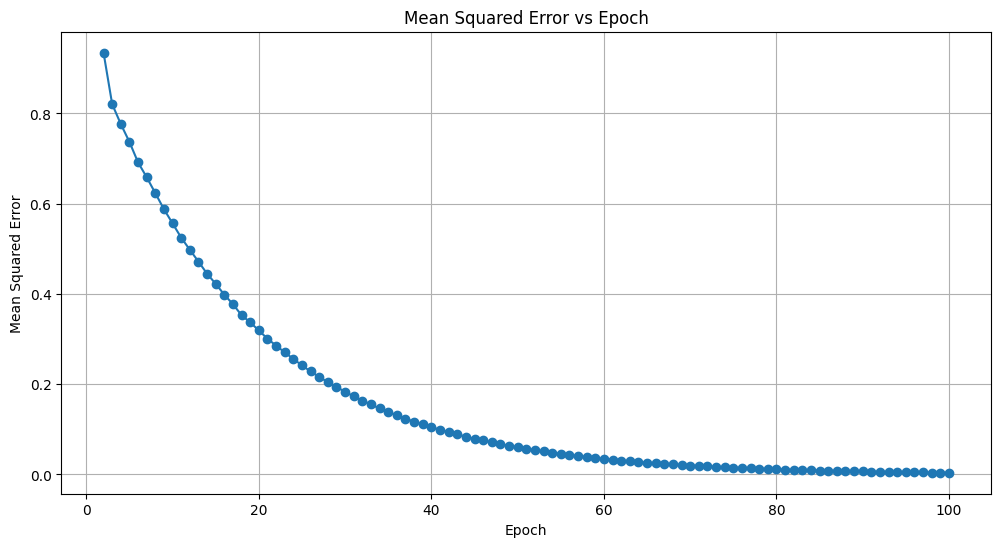

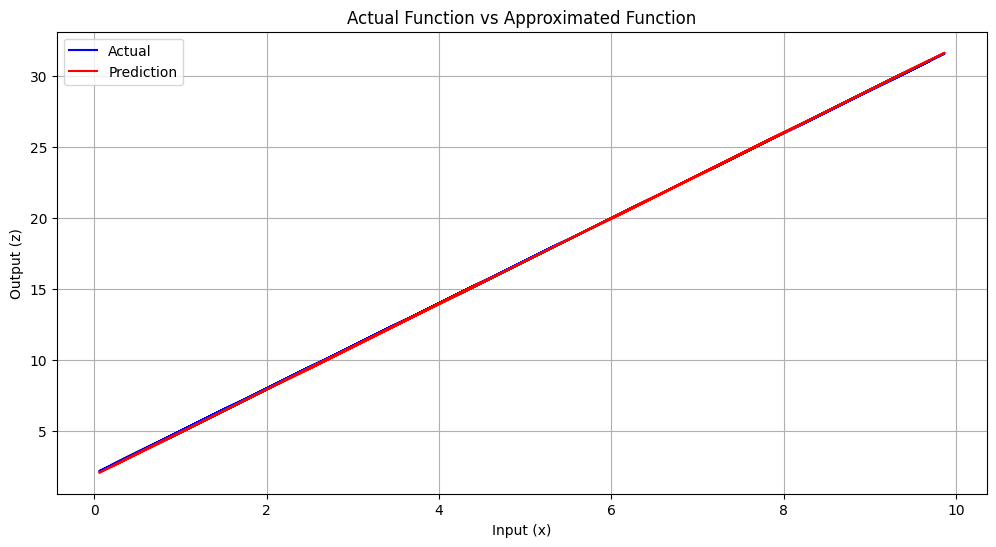

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate, epochs):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.mse_history = []

    def linear(self, x):
        return x

    def linear_derivative(self, x):
        return 1

    def predict(self, x):
        net_input = np.dot(x, self.weights) + self.bias
        return self.linear(net_input)

    def trainSGD(self, X, y):
        for epoch in range(self.epochs):
            # Initialize Mean Squared Error for this epoch
            total_mse = 0.0
            # Shuffle the training examples for this epoch
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            Y_shuffled = y[indices]
            # Iterate on each sample
            for i in range(len(X)):
                prediction = self.predict(X_shuffled[i])
                error = Y_shuffled[i] - prediction
                # Compute gradients using linear derivative
                delta = error * self.linear_derivative(prediction)
                # Update weights and bias using stochastic gradient descent
                self.weights += self.learning_rate * delta * X_shuffled[i]
                self.bias += self.learning_rate * delta
                # Accumulate the squared error for this example
                total_mse += error ** 2
            # Calculate the mean squared error for this epoch
            mean_mse = total_mse / len(X)
            self.mse_history.append(mean_mse)
            # print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error: {mean_mse:.4f}")

# Generate synthetic data
np.random.seed(42) # For reproducibility
num_samples = 100
x = np.random.uniform(low=0, high=10, size=num_samples)
z = 3 * x + 2

# Create a DataFrame to store the data
data = pd.DataFrame({'x': x, 'z': z})

# Extract the values of all columns (variables x and y) except the last one from DataFrame
F = data.iloc[:, :-1].values
# Extract the values of the last column (output z) from DataFrame
O = data.iloc[:, -1].values

# Create a perceptron instance with appropriate input size
input_size = 1
perceptron = Perceptron(input_size=input_size, learning_rate=0.001, epochs=100)

# Train the perceptron on the dataset
perceptron.trainSGD(F, O)

# Plotting MSE with respect to epoch number
plt.figure(figsize=(12, 6))
plt.plot(range(2, perceptron.epochs + 1), perceptron.mse_history[1:], marker='o')
plt.title('Mean Squared Error vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

# Plotting the actual function and the approximated function
plt.figure(figsize=(12, 6))
plt.plot(x, z, color='blue', label='Actual')
predictions = [perceptron.predict(np.array([xi])) for xi in x]
plt.plot(x, predictions, color='red', label='Prediction')
plt.title('Actual Function vs Approximated Function')
plt.xlabel('Input (x)')
plt.ylabel('Output (z)')
plt.legend()
plt.grid(True)
plt.show()


### Task 6.6

In [ ]:
import numpy as np
import pandas as pd


class Perceptron:
    def __init__(self, input_size, learning_rate, epochs):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.mse_history = []

    def linear(self, x):
        return x

    def linear_derivative(self, x):
        return 1

    def predict(self, x):
        net_input = np.dot(x, self.weights) + self.bias
        return self.linear(net_input)

    def trainSGD(self, X, y):
        for epoch in range(self.epochs):
            # Initialize Mean Squared Error for this epoch
            total_mse = 0.0
            # Shuffle the training examples for this epoch
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            Y_shuffled = y[indices]
            # Iterate on each sample
            for i in range(len(X)):
                prediction = self.predict(X_shuffled[i])
                error = Y_shuffled[i] - prediction
                # Compute gradients using linear derivative
                delta = error * self.linear_derivative(prediction)
                # Update weights and bias using stochastic gradient descent
                self.weights += self.learning_rate * delta * X_shuffled[i]
                self.bias += self.learning_rate * delta
                # Accumulate the squared error for this example
                total_mse += error ** 2
            # Calculate the mean squared error for this epoch
            mean_mse = total_mse / len(X)
            self.mse_history.append(mean_mse)
            print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error: {mean_mse:.4f}")

# Generate synthetic data
np.random.seed(42) # For reproducibility
num_samples = 100
x = np.random.uniform(low=0, high=10, size=num_samples)
y = np.random.uniform(low=0, high=10, size=num_samples)
z = 2 * x + 3 * y
# Create a DataFrame to store the data
data = pd.DataFrame({'x': x, 'y': y, 'z': z})
# Extract the values of all columns (variables x and y) except the last one from DataFrame
F = data.iloc[:, :-1].values
# Extract the values of the last column (output z) from DataFrame
O = data.iloc[:, -1].values
# Create a perceptron instance with appropriate input size
input_size = 2
perceptron = Perceptron(input_size=input_size, learning_rate=0.001, epochs=10)
# Train the perceptron on the dataset
perceptron.trainSGD(F, O)
# Test the trained model
for xi, yi in zip(x, y):
    prediction = perceptron.predict(np.array([xi, yi]))
    print(f"Input: ({xi}, {yi}), Actual: {2*xi + 3*yi}, Prediction: {prediction}")



Epoch 1/10, Mean Squared Error: 75.4408
Epoch 2/10, Mean Squared Error: 0.1795
Epoch 3/10, Mean Squared Error: 0.0986
Epoch 4/10, Mean Squared Error: 0.0824
Epoch 5/10, Mean Squared Error: 0.0788
Epoch 6/10, Mean Squared Error: 0.0753
Epoch 7/10, Mean Squared Error: 0.0731
Epoch 8/10, Mean Squared Error: 0.0710
Epoch 9/10, Mean Squared Error: 0.0695
Epoch 10/10, Mean Squared Error: 0.0658
Input: (3.745401188473625, 0.3142918568673425), Actual: 8.433677947549278, Prediction: 8.888827391535926
Input: (9.50714306409916, 6.364104112637804), Actual: 38.106598466111734, Prediction: 37.96777287736189
Input: (7.319939418114051, 3.143559810763267), Actual: 24.0705582685179, Prediction: 24.20542499789863
Input: (5.986584841970366, 5.085706911647028), Actual: 27.230290418881815, Prediction: 27.328214259799353
Input: (1.5601864044243652, 9.07566473926093), Actual: 30.34736702663152, Prediction: 30.450883618509785
Input: (1.5599452033620265, 2.4929222914887497), Actual: 10.598657281190302, Predicti

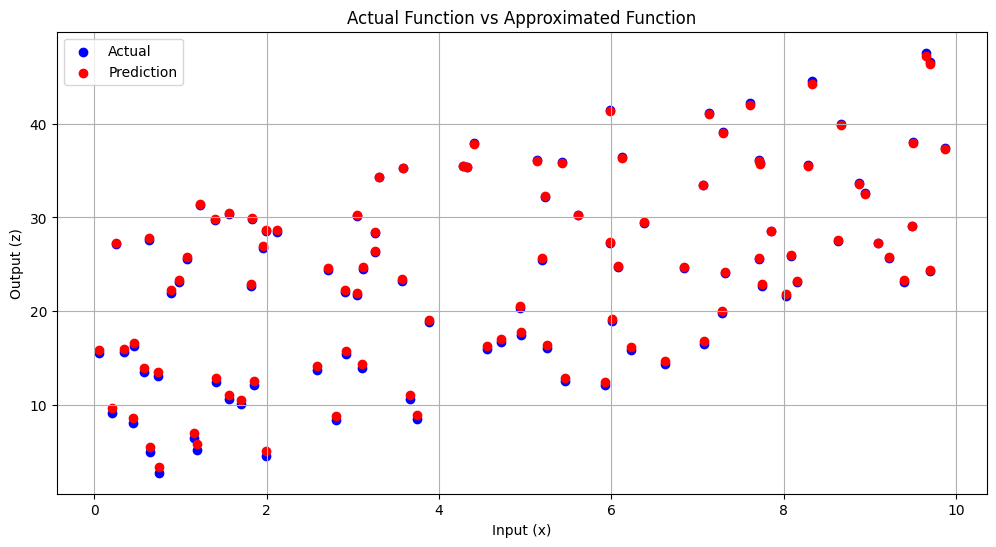

In [ ]:
import matplotlib.pyplot as plt

# Plotting the actual function and the approximated function
plt.figure(figsize=(12, 6))

# Scatter plot actual data
plt.scatter(x, z, color='blue', label='Actual')

# Generate predictions
predictions = [perceptron.predict(np.array([xi, yi])) for xi, yi in zip(x, y)]

plt.scatter(x, predictions, color='red', label='Prediction')
plt.title('Actual Function vs Approximated Function')
plt.xlabel('Input (x)')
plt.ylabel('Output (z)')
plt.legend()
plt.grid(True)
plt.show()


### Task 6.7

epochs=1000

In [ ]:
import numpy as np

class Perceptron:

  def __init__(self, input_size, learning_rate, epochs): # Initialize weights and bias with random values
    self.weights = np.random.rand(input_size)
    self.bias = np.random.rand()
    self.learning_rate = learning_rate
    self.epochs = epochs

  def step_activation(self, x):
    # Step activation function
    return 1 if x >= 0 else 0

  def predict(self, x):
    # Compute the weighted sum of inputs and bias
    net_input = np.dot(x, self.weights) + self.bias
    # Apply step activation function to the net input
    return self.step_activation(net_input)

  def trainSGD(self, X, y):
    # Training loop
    for epoch in range(self.epochs):
      # Initialize Mean Squared Error for this epoch
      total_mse = 0.0

      # Shuffle the training examples for this epoch
      indices = np.arange(len(X))
      np.random.shuffle(indices)
      X_shuffled = X[indices]
      y_shuffled = y[indices]

      # Iterate over each shuffled training example
      for i in range(len(X_shuffled)):
        # Make a prediction for the current input
        prediction = self.predict(X_shuffled[i])
        # Compute the error (desired - predicted)
        error = y_shuffled[i] - prediction
        # Update weights and bias using stochastic gradient descent
        self.weights += self.learning_rate * error * X_shuffled[i]
        self.bias += self.learning_rate * error
        # Accumulate the squared error for this example
        total_mse += error ** 2
      # Calculate the mean squared error for this epoch
      mean_mse = total_mse / len(X)
      print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error:{mean_mse:.4f}")

  def accuracy(self, X, y):
        correct_predictions = 0
        for i in range(len(X)):
            if self.predict(X[i]) == y[i]:
                correct_predictions += 1
        return correct_predictions / len(X)



# Training samples
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])
# Create a perceptron instance with 2 input neurons
perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=1000)

# Train the perceptron on the dataset
perceptron.trainSGD(X, y)
# Test the trained perceptron on the testing samples
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
accuracy = perceptron.accuracy(test_data, y)
for data in test_data:
  prediction = perceptron.predict(data)
  print(f"Input: {data}, Prediction: {prediction}")
print(f"Accuracy: {accuracy * 100:.2f}%")

Epoch 1/1000, Mean Squared Error:0.5000
Epoch 2/1000, Mean Squared Error:0.5000
Epoch 3/1000, Mean Squared Error:0.5000
Epoch 4/1000, Mean Squared Error:0.5000
Epoch 5/1000, Mean Squared Error:0.5000
Epoch 6/1000, Mean Squared Error:0.5000
Epoch 7/1000, Mean Squared Error:0.5000
Epoch 8/1000, Mean Squared Error:0.5000
Epoch 9/1000, Mean Squared Error:0.5000
Epoch 10/1000, Mean Squared Error:0.5000
Epoch 11/1000, Mean Squared Error:0.5000
Epoch 12/1000, Mean Squared Error:0.5000
Epoch 13/1000, Mean Squared Error:0.5000
Epoch 14/1000, Mean Squared Error:0.5000
Epoch 15/1000, Mean Squared Error:0.5000
Epoch 16/1000, Mean Squared Error:0.5000
Epoch 17/1000, Mean Squared Error:0.5000
Epoch 18/1000, Mean Squared Error:0.5000
Epoch 19/1000, Mean Squared Error:0.5000
Epoch 20/1000, Mean Squared Error:0.5000
Epoch 21/1000, Mean Squared Error:0.5000
Epoch 22/1000, Mean Squared Error:0.5000
Epoch 23/1000, Mean Squared Error:0.5000
Epoch 24/1000, Mean Squared Error:0.5000
Epoch 25/1000, Mean Squar

### Task 6.8

epochs=10000

In [ ]:
import numpy as np

class Perceptron:

  def __init__(self, input_size, learning_rate, epochs): # Initialize weights and bias with random values
    self.weights = np.random.rand(input_size)
    self.bias = np.random.rand()
    self.learning_rate = learning_rate
    self.epochs = epochs

  def step_activation(self, x):
    # Step activation function
    return 1 if x >= 0 else 0

  def predict(self, x):
    # Compute the weighted sum of inputs and bias
    net_input = np.dot(x, self.weights) + self.bias
    # Apply step activation function to the net input
    return self.step_activation(net_input)

  def trainSGD(self, X, y):
    # Training loop
    for epoch in range(self.epochs):
      # Initialize Mean Squared Error for this epoch
      total_mse = 0.0

      # Shuffle the training examples for this epoch
      indices = np.arange(len(X))
      np.random.shuffle(indices)
      X_shuffled = X[indices]
      y_shuffled = y[indices]

      # Iterate over each shuffled training example
      for i in range(len(X_shuffled)):
        # Make a prediction for the current input
        prediction = self.predict(X_shuffled[i])
        # Compute the error (desired - predicted)
        error = y_shuffled[i] - prediction
        # Update weights and bias using stochastic gradient descent
        self.weights += self.learning_rate * error * X_shuffled[i]
        self.bias += self.learning_rate * error
        # Accumulate the squared error for this example
        total_mse += error ** 2
      # Calculate the mean squared error for this epoch
      mean_mse = total_mse / len(X)
      print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error:{mean_mse:.4f}")

  def accuracy(self, X, y):
        correct_predictions = 0
        for i in range(len(X)):
            if self.predict(X[i]) == y[i]:
                correct_predictions += 1
        return correct_predictions / len(X)



# Training samples
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])
# Create a perceptron instance with 2 input neurons
perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=10000)

# Train the perceptron on the dataset
perceptron.trainSGD(X, y)
# Test the trained perceptron on the testing samples
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
accuracy = perceptron.accuracy(test_data, y)
for data in test_data:
  prediction = perceptron.predict(data)
  print(f"Input: {data}, Prediction: {prediction}")
print(f"Accuracy: {accuracy * 100:.2f}%")

Streaming output truncated to the last 5000 lines.
Epoch 5006/10000, Mean Squared Error:1.0000
Epoch 5007/10000, Mean Squared Error:0.2500
Epoch 5008/10000, Mean Squared Error:0.7500
Epoch 5009/10000, Mean Squared Error:0.5000
Epoch 5010/10000, Mean Squared Error:0.5000
Epoch 5011/10000, Mean Squared Error:0.7500
Epoch 5012/10000, Mean Squared Error:0.5000
Epoch 5013/10000, Mean Squared Error:0.2500
Epoch 5014/10000, Mean Squared Error:0.7500
Epoch 5015/10000, Mean Squared Error:0.5000
Epoch 5016/10000, Mean Squared Error:0.5000
Epoch 5017/10000, Mean Squared Error:1.0000
Epoch 5018/10000, Mean Squared Error:1.0000
Epoch 5019/10000, Mean Squared Error:0.7500
Epoch 5020/10000, Mean Squared Error:0.2500
Epoch 5021/10000, Mean Squared Error:0.7500
Epoch 5022/10000, Mean Squared Error:0.5000
Epoch 5023/10000, Mean Squared Error:0.7500
Epoch 5024/10000, Mean Squared Error:0.7500
Epoch 5025/10000, Mean Squared Error:0.5000
Epoch 5026/10000, Mean Squared Error:0.7500
Epoch 5027/10000, Mean Sq

### Task 6.9

1. hidden_layer_sizes=(10,), max_iter=1000

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Test Accuracy: 0.9667


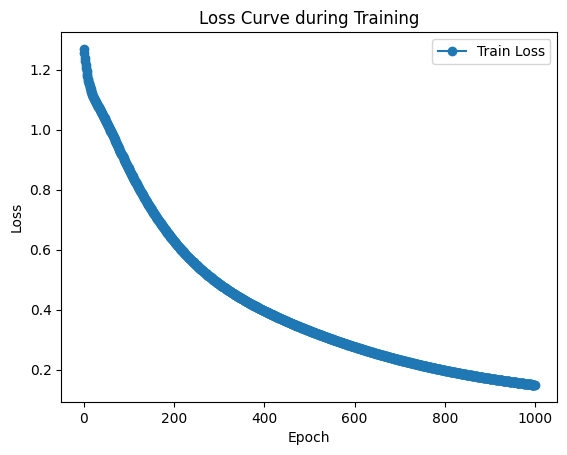

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and validation sets
X_train,  X_test,  y_train,  y_test  =  train_test_split(X,  y,  test_size=0.2, random_state=42)

# Create an MLPClassifier with one hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)

# Train the MLPClassifier
mlp.fit(X_train, y_train)

# make prediction on the testing part
y_pred = mlp.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the loss curve
plt.plot(mlp.loss_curve_, marker='o', label='Train Loss')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

2. hidden_layer_sizes=(50,), activation=relu, max_iter=1000, learning_rate=0.01

Test Accuracy: 1.0000


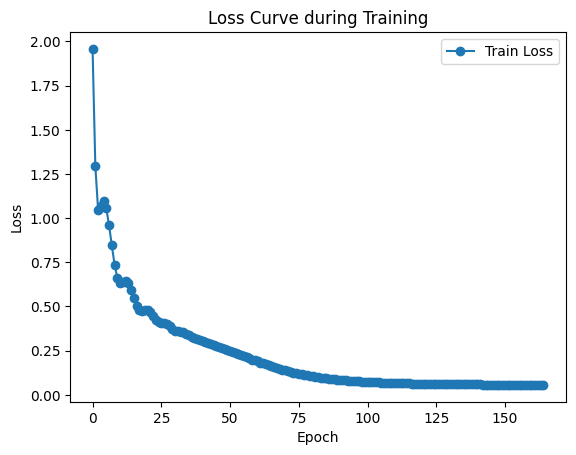

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and validation sets
X_train,  X_test,  y_train,  y_test  =  train_test_split(X,  y,  test_size=0.2, random_state=42)

# Create an MLPClassifier with one hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', max_iter=1000, learning_rate='constant', learning_rate_init=0.01)

# Train the MLPClassifier
mlp.fit(X_train, y_train)

# make prediction on the testing part
y_pred = mlp.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the loss curve
plt.plot(mlp.loss_curve_, marker='o', label='Train Loss')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

3. hidden_layer_sizes=(35, 15), activation=tanh, max_iter=1000, learning_rate=0.01

Test Accuracy: 1.0000


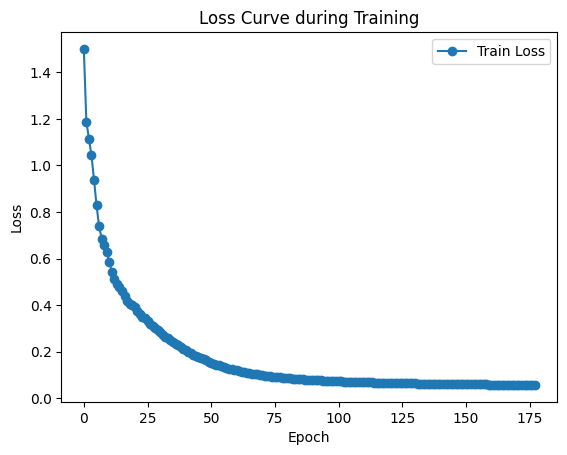

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and validation sets
X_train,  X_test,  y_train,  y_test  =  train_test_split(X,  y,  test_size=0.2, random_state=42)

# Create an MLPClassifier with one hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(50,), activation='tanh', max_iter=1000, learning_rate='constant', learning_rate_init=0.01)

# Train the MLPClassifier
mlp.fit(X_train, y_train)

# make prediction on the testing part
y_pred = mlp.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the loss curve
plt.plot(mlp.loss_curve_, marker='o', label='Train Loss')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Task 6.10

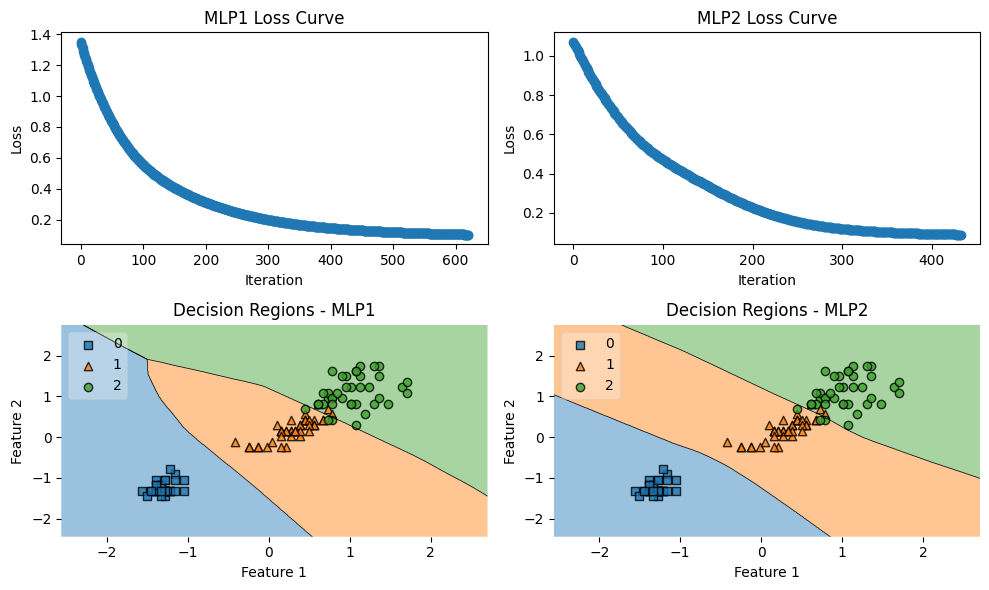

MLP2 is better, loss function decreases quickly, indicating that it learns the data patterns faster. And decision boundaries defined better and more complex.

### Task 6.11

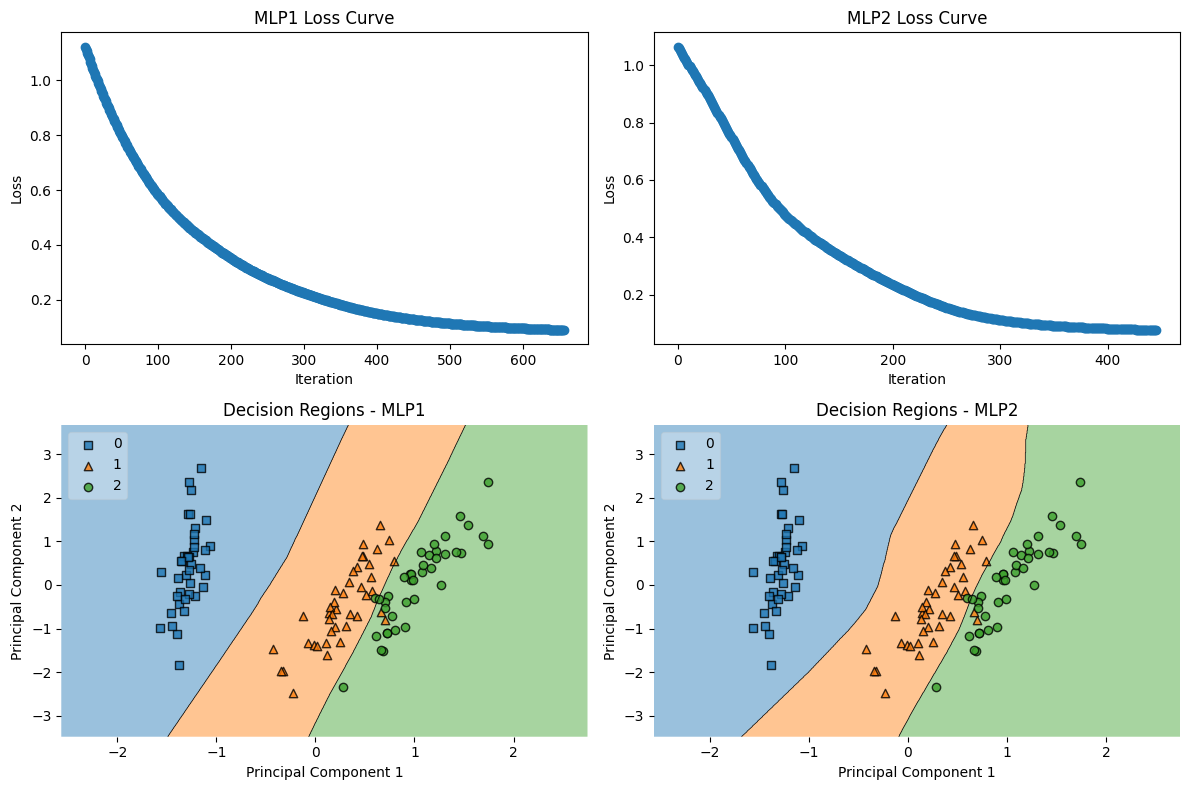

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Apply PCA to select the top two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create two MLPClassifiers with different configurations
mlp1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp2 = MLPClassifier(hidden_layer_sizes=(35, 15), max_iter=1000, random_state=42)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Principal Component 1')
axes[1, 0].set_ylabel('Principal Component 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Principal Component 1')
axes[1, 1].set_ylabel('Principal Component 2')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

MLP2's loss function here also decays faster than MLP1, suggesting that it learns the data pattern more quickly. And the decision boundaries for both are well defined, however MLP2's has a little more complex boundaries.

### Task 6.12


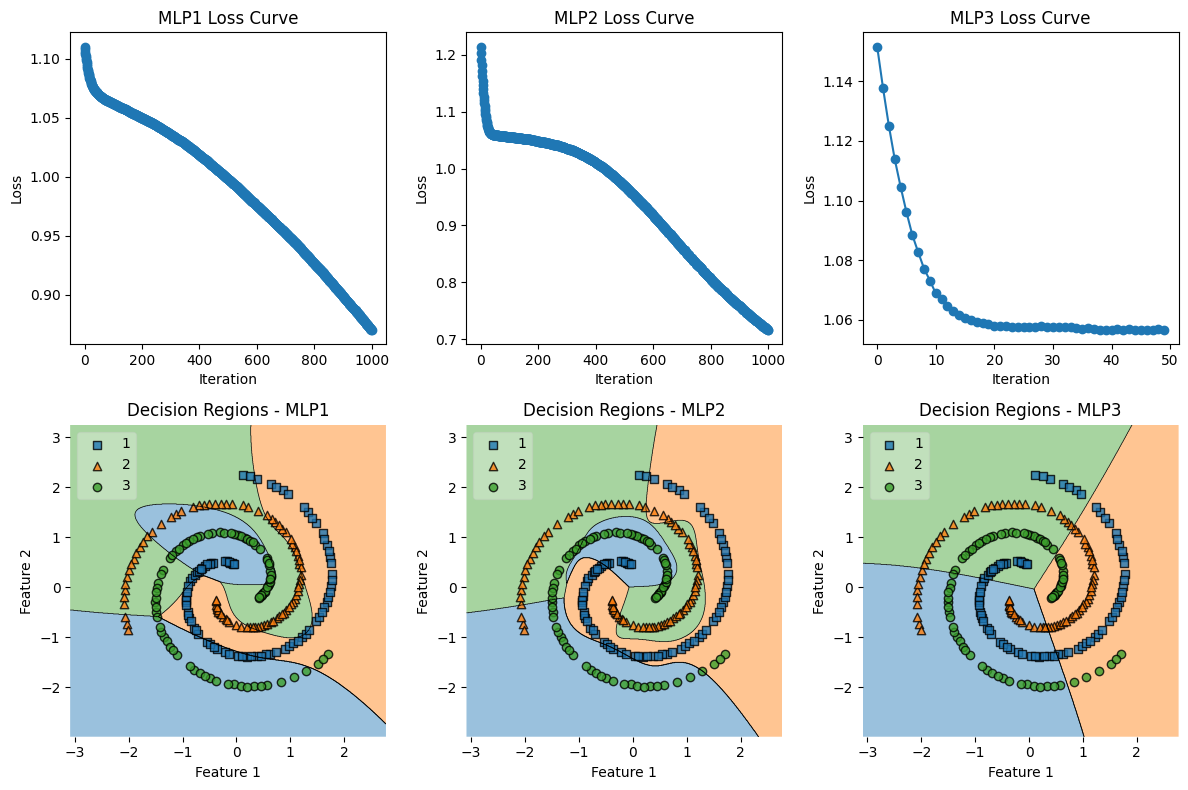

Here, MPL2 performs the best. While MLP3's loss curve decreases the quickest,

increasing iterations to 10000:

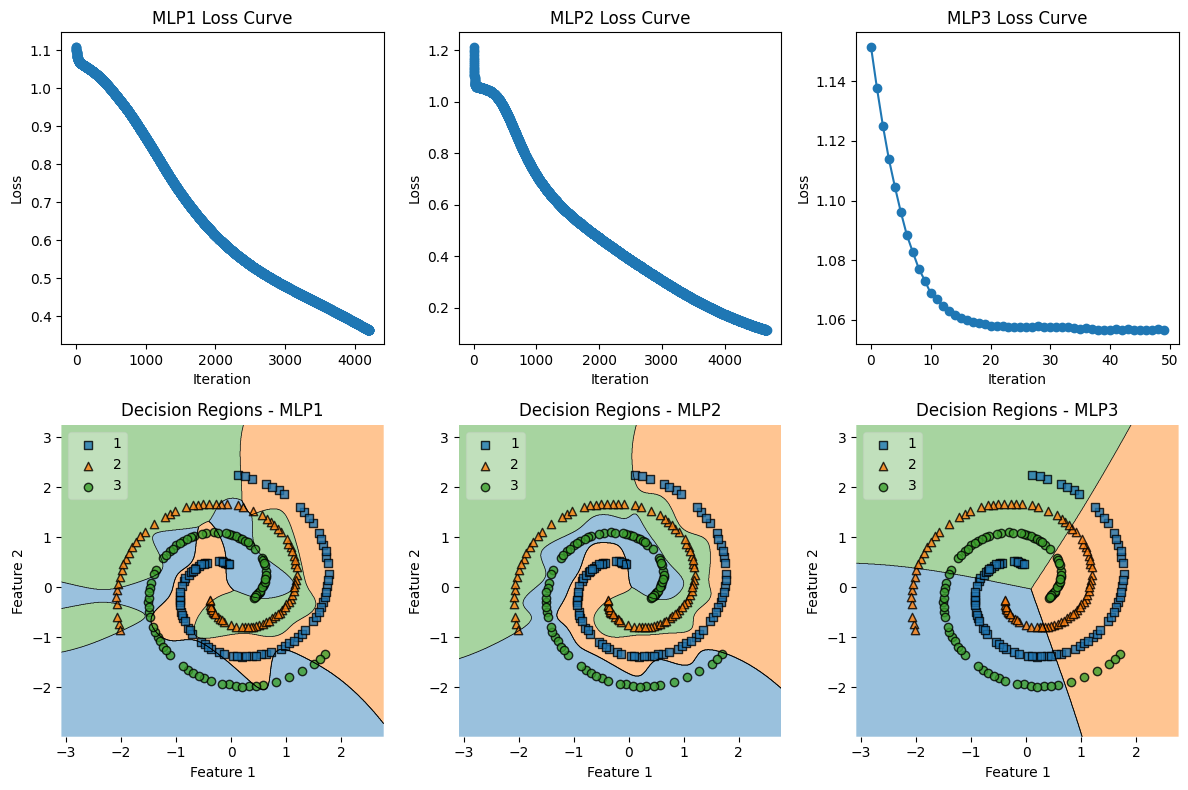

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

file_path = r'./spiral.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values
# Split the data into training and testing sets
X_train,  X_test,  y_train,  y_test  =  train_test_split(X,  y,  test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create three MLPClassifiers with different configurations
mlp1  =  MLPClassifier(hidden_layer_sizes=(10),  max_iter=10000,  random_state=42, activation='tanh',learning_rate_init=0.001)
mlp2  =  MLPClassifier(hidden_layer_sizes=(40),  max_iter=10000,  random_state=42, activation='tanh', learning_rate_init=0.001)
mlp3  =  MLPClassifier(hidden_layer_sizes=(100), max_iter=10000, random_state=42, activation='tanh', learning_rate_init=0.001)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)
mlp3.fit(X_train, y_train)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot loss curve for mlp3
axes[0, 2].plot(mlp3.loss_curve_, marker='o')
axes[0, 2].set_title('MLP3 Loss Curve')
axes[0, 2].set_xlabel('Iteration')
axes[0, 2].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Plot decision regions for mlp3
plot_decision_regions(X_train, y_train, clf=mlp3, legend=2, ax=axes[1, 2])
axes[1, 2].set_title('Decision Regions - MLP3')
axes[1, 2].set_xlabel('Feature 1')
axes[1, 2].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

MLP2 also perform the best with 10000 iterations, its decision boundaries capture the spiral more accurately now. The decision boundary for MLP3 are still harshly defined and dont capture the spiral. MLP1 has much more irregularities now.

### Task 6.13

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


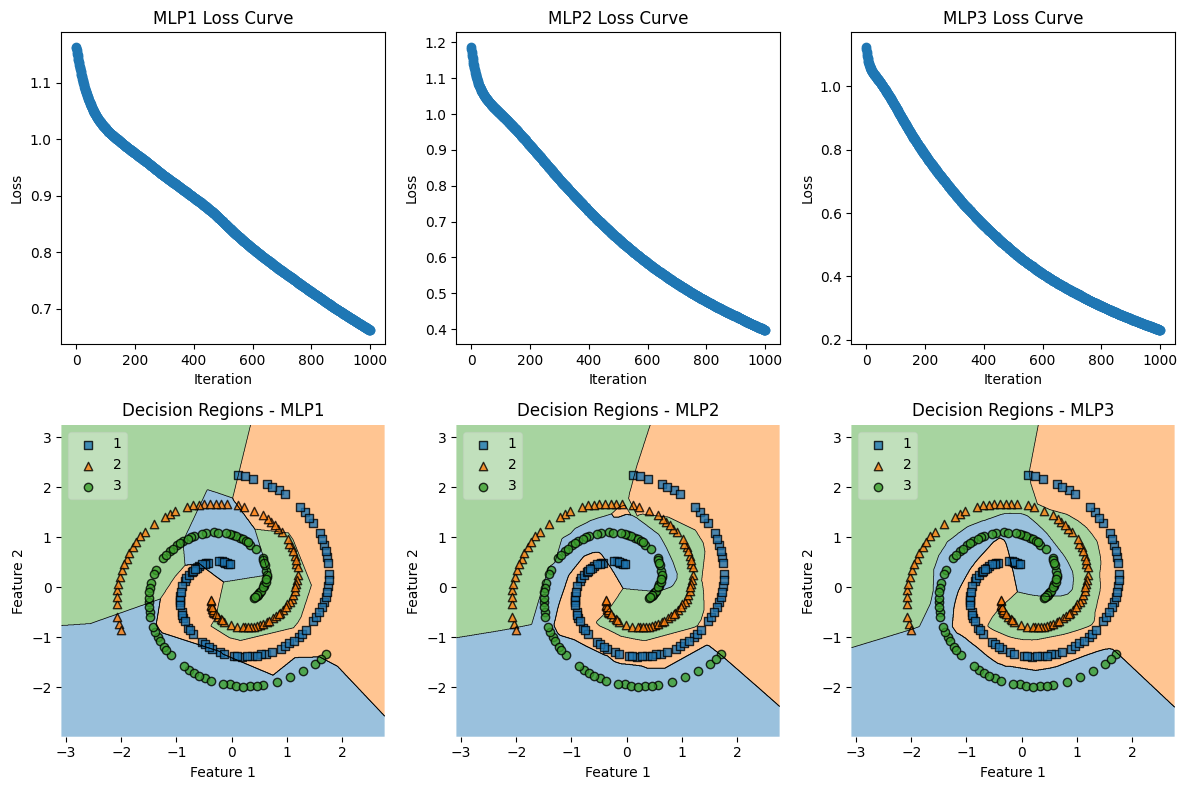

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

file_path = r'./spiral.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values
# Split the data into training and testing sets
X_train,  X_test,  y_train,  y_test  =  train_test_split(X,  y,  test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create three MLPClassifiers with different configurations
mlp1  =  MLPClassifier(hidden_layer_sizes=(10),  max_iter=1000,  random_state=42, activation='relu',learning_rate_init=0.001)
mlp2  =  MLPClassifier(hidden_layer_sizes=(40),  max_iter=1000,  random_state=42, activation='relu', learning_rate_init=0.001)
mlp3  =  MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, random_state=42, activation='relu', learning_rate_init=0.001)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)
mlp3.fit(X_train, y_train)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot loss curve for mlp3
axes[0, 2].plot(mlp3.loss_curve_, marker='o')
axes[0, 2].set_title('MLP3 Loss Curve')
axes[0, 2].set_xlabel('Iteration')
axes[0, 2].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Plot decision regions for mlp3
plot_decision_regions(X_train, y_train, clf=mlp3, legend=2, ax=axes[1, 2])
axes[1, 2].set_title('Decision Regions - MLP3')
axes[1, 2].set_xlabel('Feature 1')
axes[1, 2].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Comparing these results using the relu function with the results from Example 5 using the tanh function, the difference is very clear. All three models have similar loss curves, but the decision boundaries for MLP3 capture the spiral dataset more accurately, making it the best.

trying the models with 10000 iterations:

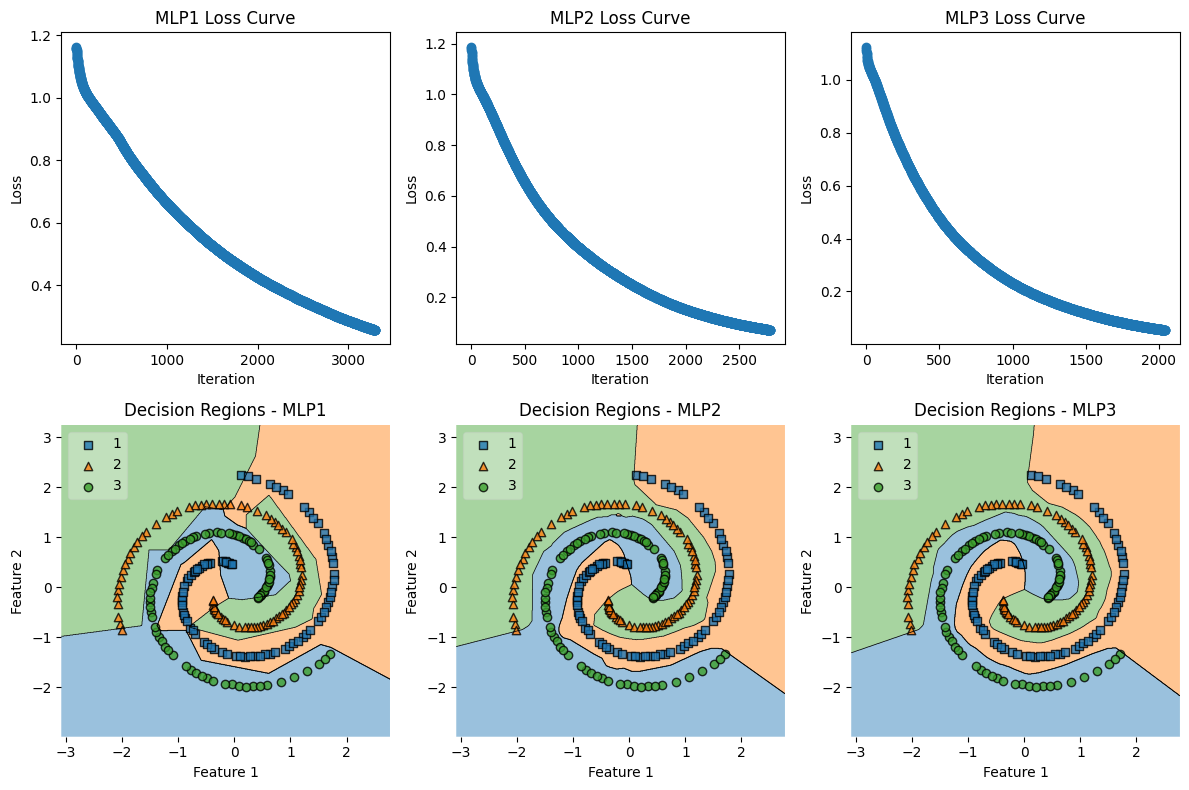

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

file_path = r'./spiral.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values
# Split the data into training and testing sets
X_train,  X_test,  y_train,  y_test  =  train_test_split(X,  y,  test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create three MLPClassifiers with different configurations
mlp1  =  MLPClassifier(hidden_layer_sizes=(10),  max_iter=10000,  random_state=42, activation='relu',learning_rate_init=0.001)
mlp2  =  MLPClassifier(hidden_layer_sizes=(40),  max_iter=10000,  random_state=42, activation='relu', learning_rate_init=0.001)
mlp3  =  MLPClassifier(hidden_layer_sizes=(100), max_iter=10000, random_state=42, activation='relu', learning_rate_init=0.001)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)
mlp3.fit(X_train, y_train)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot loss curve for mlp3
axes[0, 2].plot(mlp3.loss_curve_, marker='o')
axes[0, 2].set_title('MLP3 Loss Curve')
axes[0, 2].set_xlabel('Iteration')
axes[0, 2].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Plot decision regions for mlp3
plot_decision_regions(X_train, y_train, clf=mlp3, legend=2, ax=axes[1, 2])
axes[1, 2].set_title('Decision Regions - MLP3')
axes[1, 2].set_xlabel('Feature 1')
axes[1, 2].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Increasing the iterations makes the models perform better. The loss curves for MLP2 and MLP3 decrease quicker than MLP1, and the decision boundaries for both are almost identical, but due to MLP3's loss curve decreasing quicker, it is the best one.

### Task 6.14

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


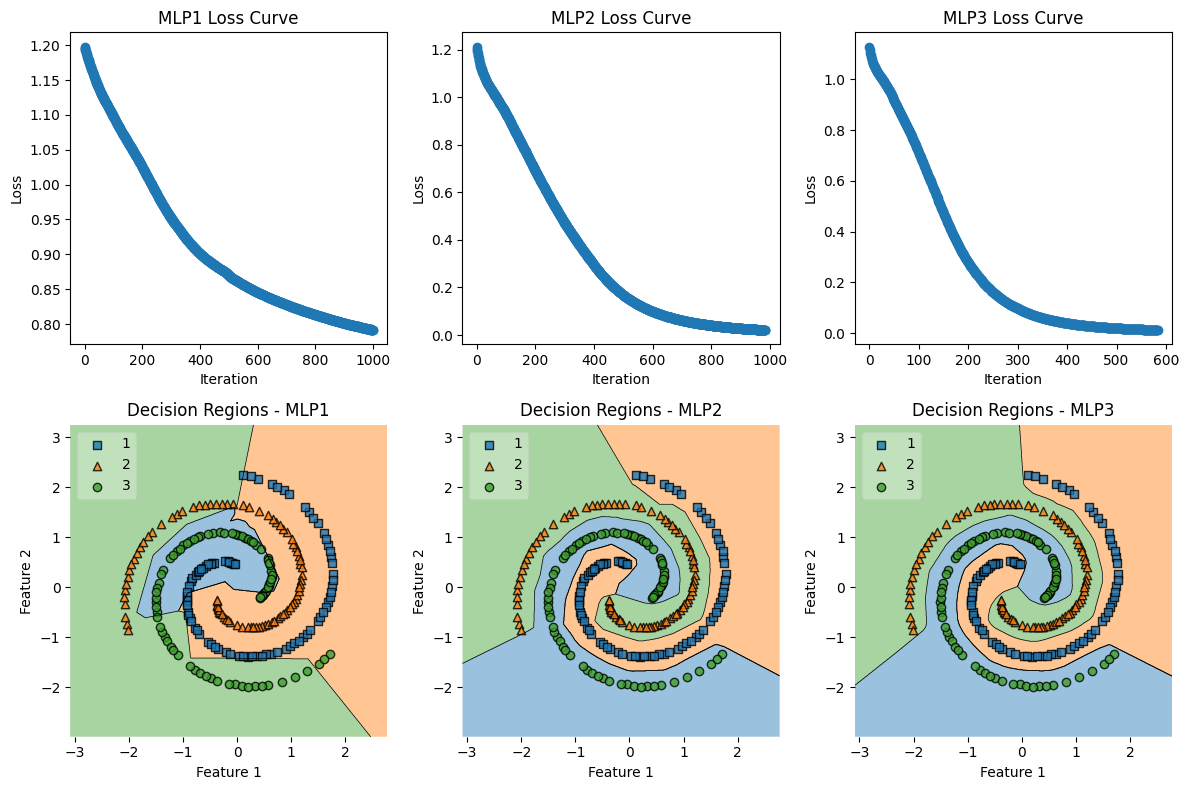

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

file_path = r'./spiral.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values
# Split the data into training and testing sets
X_train,  X_test,  y_train,  y_test  =  train_test_split(X,  y,  test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create three MLPClassifiers with different configurations
mlp1  =  MLPClassifier(hidden_layer_sizes=(7, 3),  max_iter=1000,  random_state=42, activation='relu',learning_rate_init=0.001)
mlp2  =  MLPClassifier(hidden_layer_sizes=(27, 13),  max_iter=1000,  random_state=42, activation='relu', learning_rate_init=0.001)
mlp3  =  MLPClassifier(hidden_layer_sizes=(70, 30), max_iter=1000, random_state=42, activation='relu', learning_rate_init=0.001)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)
mlp3.fit(X_train, y_train)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot loss curve for mlp3
axes[0, 2].plot(mlp3.loss_curve_, marker='o')
axes[0, 2].set_title('MLP3 Loss Curve')
axes[0, 2].set_xlabel('Iteration')
axes[0, 2].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Plot decision regions for mlp3
plot_decision_regions(X_train, y_train, clf=mlp3, legend=2, ax=axes[1, 2])
axes[1, 2].set_title('Decision Regions - MLP3')
axes[1, 2].set_xlabel('Feature 1')
axes[1, 2].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Comparing these results using the relu function and different hidden layers with the results from Example 5 using the tanh function and the results from Task 6.13 using the relu function, the difference is very clear. MLP1 and MLP2 have similar loss curves, while MLP3 has the best one. But the decision boundaries for MLP2 and MLP3 capture the spiral dataset more accurately, but because MLP3's loss curve decreases quicker, that makes it the best.

### Task 6.15

Best parameters found: {'activation': 'relu', 'hidden_layer_sizes': (27, 13), 'learning_rate_init': 0.001, 'max_iter': 1000}
Test set accuracy: 0.98


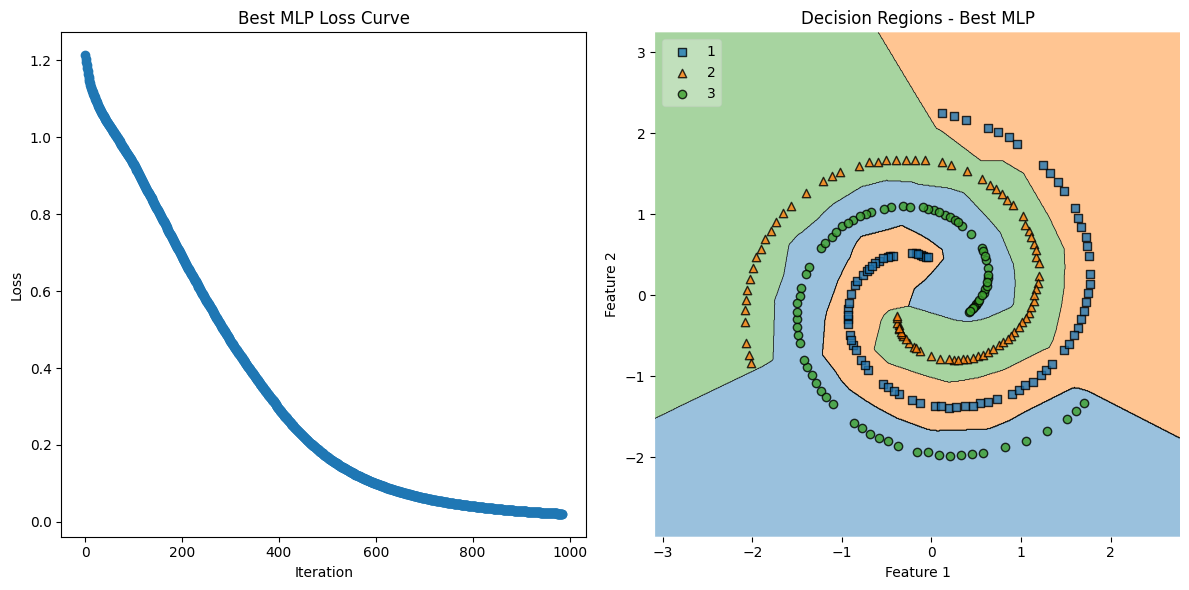

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions

file_path = r'./spiral.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(7, 3), (27, 13), (70, 30)],
    'max_iter': [1000],
    'activation': ['relu'],
    'learning_rate_init': [0.001]
}

# Create the MLPClassifier
mlp = MLPClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_mlp = grid_search.best_estimator_

# Print the best parameters
print(f"Best parameters found: {grid_search.best_params_}")

# Train the best MLP model
best_mlp.fit(X_train, y_train)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot loss curve for the best MLP model
axes[0].plot(best_mlp.loss_curve_, marker='o')
axes[0].set_title('Best MLP Loss Curve')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('Loss')

# Plot decision regions for the best MLP model
plot_decision_regions(X_train, y_train, clf=best_mlp, legend=2, ax=axes[1])
axes[1].set_title('Decision Regions - Best MLP')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

# Evaluate the best model on the test set and print the accuracy
test_accuracy = best_mlp.score(X_test, y_test)
print(f"Test set accuracy: {test_accuracy:.2f}")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


It appears the grid search chose MLP2 as the best one, as it has better loss curve, and well spiraly defined decision boundaries.

### Task 6.16









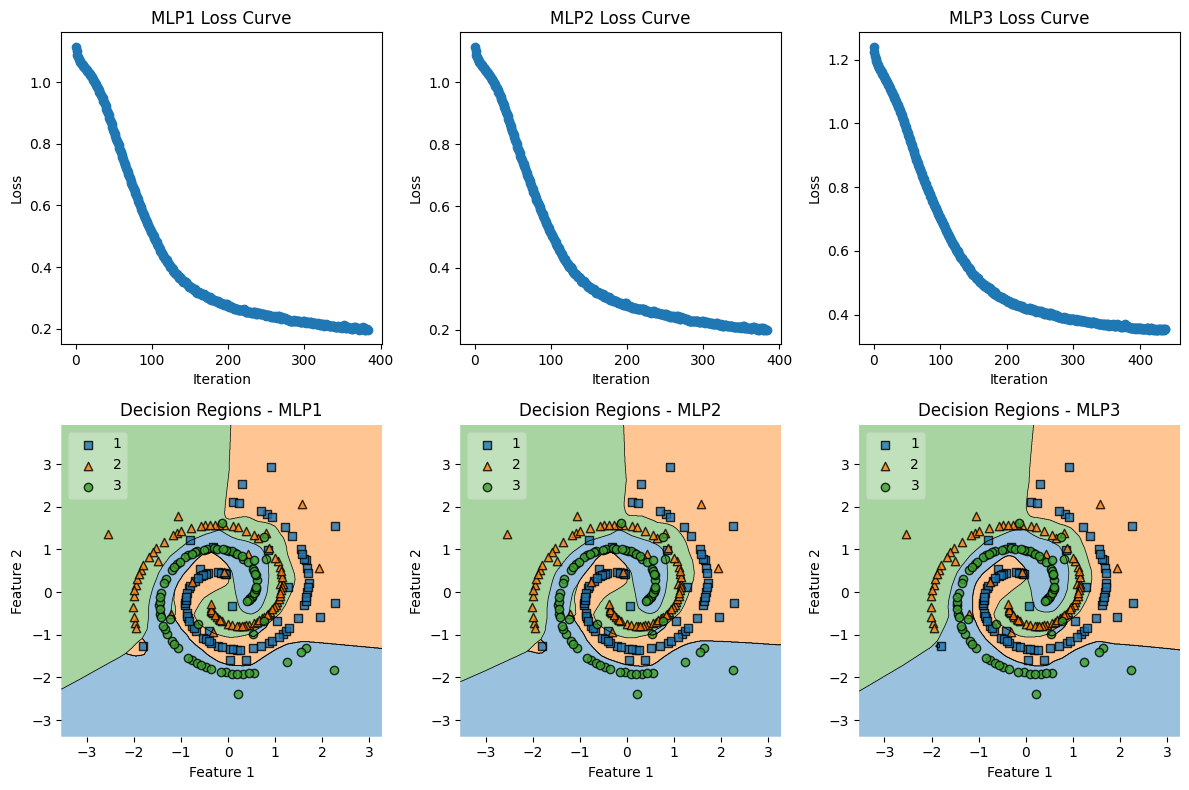

MLP3 here performs the best, even tho its loss curve stops at 0.4 which is a bit higher than 0.2 for MLP2. But the decision boundaries for MLP3 capture the spiral very well with a bit more defined regions.